In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker


In [2]:
file_path = "resources_2/general_dataset_v5.csv"
df= pd.read_csv(file_path)
df.head()

,country_code,country_name,year,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,extreme_temperatures_count,floods_count,storms_count,wildfires_count,total_count_disasters,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,agriculture_value_added_constants,agriculture_value_added_percentage_gdp
0,AFG,Afghanistan,1988,2856896,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.116008,11618008,0.988,NaN,NaN
1,AFG,Afghanistan,1990,2603238,NaN,0.0,144.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,4.476954,12412311,0.847,NaN,NaN
2,AFG,Afghanistan,1991,2427366,NaN,0.0,80.0,1193.0,0.0,0.0,...,1.0,3.0,0.0,0.0,4.0,6.900124,13299016,-0.058,NaN,NaN
3,AFG,Afghanistan,1992,1379462,NaN,0.0,0.0,600.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,8.546107,14485543,-0.214,NaN,NaN
4,AFG,Afghanistan,1993,1333055,NaN,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,1.0,0.0,1.0,8.790897,15816601,0.292,NaN,NaN


In [3]:
mx_df= df[(df['country_name'] == 'Mexico')]
mx_df.columns.tolist()

['country_code',
 'country_name',
 'year',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages_as_a_share_of_gdp',
 'economic_damages',
 'economic_damages_thousands',
 'people_affected_per_100k',
 'number_of_deaths',
 'droug

In [4]:
mx_df.set_index('year',inplace = True)
mx_df.head(5)

,country_code,country_name,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,people_affected_by_drought_per_100k,...,extreme_temperatures_count,floods_count,storms_count,wildfires_count,total_count_disasters,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,agriculture_value_added_constants,agriculture_value_added_percentage_gdp
year,,,,,,,,,,,,,,,,,,,,,
1988,MEX,Mexico,305665561,100.447264,0.0,23.0,0.0,288.0,0.0,0.0,...,1.0,0.0,3.0,0.0,5.0,1.986009,80788725,0.131,2.349365e+10,6.478094
1989,MEX,Mexico,323480321,26.806948,0.0,0.0,40.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,2.0,1.937089,82368930,0.445,2.316212e+10,6.452598
1990,MEX,Mexico,317042355,28.196381,0.0,380.0,45.0,38.0,0.0,0.0,...,1.0,1.0,1.0,0.0,3.0,1.893130,83943135,0.226,2.484425e+10,6.667096
1991,MEX,Mexico,330133158,23.429719,0.0,0.0,23.0,13.0,0.0,0.0,...,0.0,2.0,1.0,0.0,3.0,1.852437,85512621,0.233,2.540117e+10,6.496990
1992,MEX,Mexico,332780138,14.844392,0.0,80.0,0.0,3.0,0.0,0.0,...,2.0,0.0,1.0,0.0,3.0,1.810740,87075136,0.055,2.483518e+10,5.998981


In [5]:
mx_df = mx_df.drop([
 'country_code',
 'country_name',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages',
 'economic_damages_thousands',
 'drought_count',
 'extreme_temperatures_count',
 'floods_count',
 'storms_count',
 'wildfires_count',
 'population_population_growth_annual_percentage',
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
], axis=1)
mx_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1988 to 2020
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   annual_co2_emissions_tons               32 non-null     int64  
 1   economic_damages_as_a_share_of_gdp      32 non-null     float64
 2   people_affected_per_100k                32 non-null     float64
 3   number_of_deaths                        32 non-null     float64
 4   total_count_disasters                   32 non-null     float64
 5   population_population_total             32 non-null     int64  
 6   temperature_change_temp_change_celsius  32 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 2.0 KB


In [6]:
mx_df.columns.tolist()

['annual_co2_emissions_tons',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']

### Look at the endogenous variable: 'economic_damages_as_a_share_of_gdp'

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

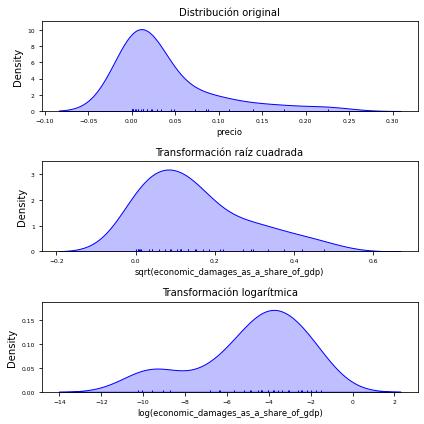

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    mx_df.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(mx_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(mx_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

La variable "economic_damages_as_a_share_of_gdp" tiene una distribución asimétrica con una cola positiva, sesgo a la derecha. A este tipo de distribución suele visualizarse mejor tras aplicar el logarítmica o la raíz cuadrada.

In [8]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(mx_df.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,5190.053651,-3.379242,173.237637,inf,0.183068,0.206671
chi2,7233.988513,-75.010951,183.863125,inf,0.088259,0.945660
gamma,7884.904674,54.992585,186.620232,inf,0.146613,0.454357
exponpow,8787.357705,-136.981793,190.087878,inf,0.152812,0.403081
powerlaw,8827.436339,-175.290750,190.233496,inf,0.129866,0.607136
beta,9103.009827,-164.564744,194.682927,inf,0.163171,0.325551
expon,14026.054825,-56.699852,201.585425,inf,0.236727,0.046246
cauchy,15045.817539,115.109662,203.831293,inf,0.287950,0.007647
logistic,18461.165232,17.260575,210.377511,inf,0.266402,0.017051
norm,19238.599845,-67.543609,211.697489,inf,0.263881,0.018649


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Correlation analysis:

In [9]:
# Resume table
mx_df.corr ()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
annual_co2_emissions_tons,1.000000,0.008646,0.153451,-0.354003,0.112158,0.792202,0.467993
economic_damages_as_a_share_of_gdp,0.008646,1.000000,-0.094689,0.036291,0.277131,-0.082425,-0.180268
people_affected_per_100k,0.153451,-0.094689,1.000000,-0.028403,0.460186,0.090714,0.071960
number_of_deaths,-0.354003,0.036291,-0.028403,1.000000,0.220202,-0.379091,-0.231792
total_count_disasters,0.112158,0.277131,0.460186,0.220202,1.000000,0.160504,0.301609
population_population_total,0.792202,-0.082425,0.090714,-0.379091,0.160504,1.000000,0.808904
temperature_change_temp_change_celsius,0.467993,-0.180268,0.071960,-0.231792,0.301609,0.808904,1.000000


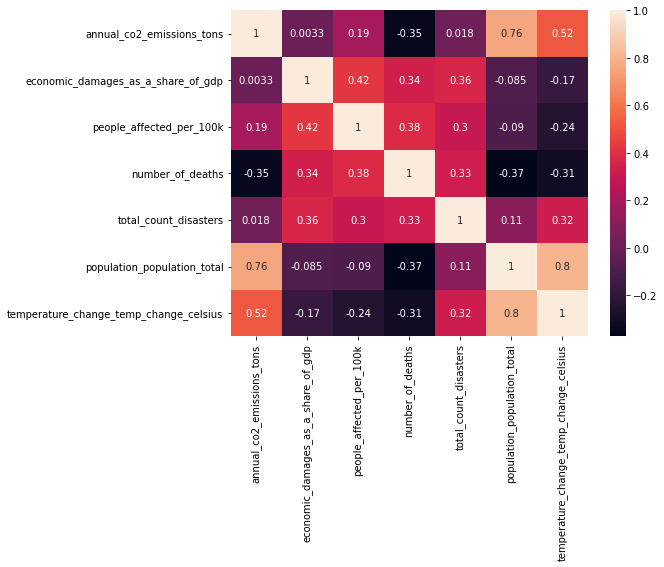

In [10]:
# Heatmap For Correlation Matrix
mx_corr_df = mx_df.corr(method='spearman')
plt.figure(figsize=(8, 6))
sb.heatmap(mx_corr_df, annot=True)
plt.show()

### One to one correlation test:

El análisis gráfico hecho previamente y los test estadísticos mostraron evidencias de que no se puede asumir normalidad en las variables de desastres. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho y se comunique en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución, por ejemplo, aplicando el logaritmo.

#### - Annual CO2 Emissions	vs Population

In [11]:
# Calculation of correlation and significance with Scipy
# ==============================================================================
r, p = stats.pearsonr(mx_df['annual_co2_emissions_tons'], mx_df['population_population_total'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(mx_df['annual_co2_emissions_tons'], mx_df['population_population_total'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(mx_df['annual_co2_emissions_tons'], mx_df['population_population_total'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.7922021477066079, p-value=6.585882142702017e-08
Correlación Spearman: r=0.7569648093841641, p-value=5.340150671876903e-07
Correlación Pearson: r=0.6370967741935485, p-value=2.9547682978424505e-08


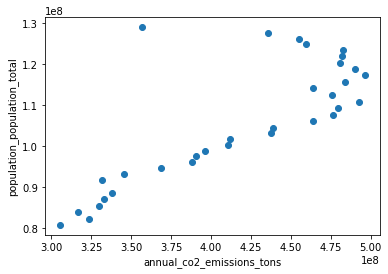

In [12]:
plt.scatter(mx_df.annual_co2_emissions_tons , mx_df.population_population_total )
plt.xlabel('annual_co2_emissions_tons')
plt.ylabel('population_population_total')
plt.show()

#### - Temperature Anomalies vs Annual CO2 Emissions 

In [13]:
# Calculation of correlation and significance with Scipy
# ==============================================================================
r, p = stats.pearsonr(mx_df['temperature_change_temp_change_celsius'], mx_df['annual_co2_emissions_tons'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(mx_df['temperature_change_temp_change_celsius'], mx_df['annual_co2_emissions_tons'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(mx_df['temperature_change_temp_change_celsius'], mx_df['annual_co2_emissions_tons'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.46799337617271675, p-value=0.0069105395138808
Correlación Spearman: r=0.5187901095420344, p-value=0.002348817909689795
Correlación Pearson: r=0.367677517963255, p-value=0.003155482199706381


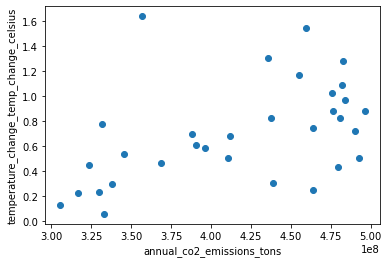

In [14]:
plt.scatter(mx_df.annual_co2_emissions_tons , mx_df.temperature_change_temp_change_celsius )
plt.xlabel('annual_co2_emissions_tons')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

#### - Total Disasters vs Temperature Anomalies

In [15]:
# Calculation of correlation and significance with Scipy
# ==============================================================================
r, p = stats.pearsonr(mx_df['total_count_disasters'], mx_df['temperature_change_temp_change_celsius'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(mx_df['total_count_disasters'], mx_df['temperature_change_temp_change_celsius'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(mx_df['total_count_disasters'], mx_df['temperature_change_temp_change_celsius'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.3016086171057737, p-value=0.09342550721736297
Correlación Spearman: r=0.3233600418664453, p-value=0.07103183198291416
Correlación Pearson: r=0.23823941594250647, p-value=0.07295284242276068


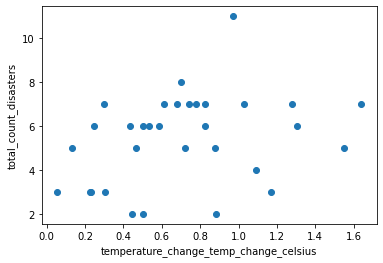

In [16]:
plt.scatter(mx_df.temperature_change_temp_change_celsius , mx_df.total_count_disasters )
plt.xlabel('temperature_change_temp_change_celsius')
plt.ylabel('total_count_disasters')
plt.show()

#### - People Affected per 100k vs Total Disasters

In [17]:
# Calculation of correlation and significance with Scipy
# ==============================================================================
r, p = stats.pearsonr(mx_df['total_count_disasters'], mx_df['people_affected_per_100k'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(mx_df['total_count_disasters'], mx_df['people_affected_per_100k'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(mx_df['total_count_disasters'], mx_df['people_affected_per_100k'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.4601859241539379, p-value=0.008045211887296054
Correlación Spearman: r=0.30010094582237834, p-value=0.09515666974582948
Correlación Pearson: r=0.2113409861029041, p-value=0.11104335030049325


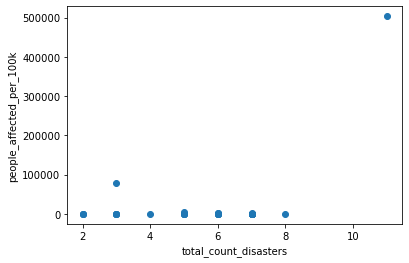

In [18]:
plt.scatter(mx_df.total_count_disasters , mx_df.people_affected_per_100k)
plt.xlabel('total_count_disasters')
plt.ylabel('people_affected_per_100k')
plt.show()

#### - Number of Deaths vs People Affected per 100k

In [19]:
# Calculation of correlation and significance with Scipy
# ==============================================================================
r, p = stats.pearsonr(mx_df['number_of_deaths'], mx_df['people_affected_per_100k'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(mx_df['number_of_deaths'], mx_df['people_affected_per_100k'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(mx_df['number_of_deaths'], mx_df['people_affected_per_100k'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=-0.028402997353723265, p-value=0.8773652724094014
Correlación Spearman: r=0.3794242276020038, p-value=0.03221188248327191
Correlación Pearson: r=0.24746908492193542, p-value=0.04770690694262572


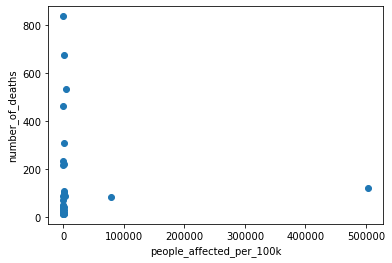

In [20]:
plt.scatter(mx_df.people_affected_per_100k, mx_df.number_of_deaths )
plt.xlabel( 'people_affected_per_100k')
plt.ylabel('number_of_deaths')
plt.show()

#### - Number of Deaths vs Economic Damages as a share of GDP

In [21]:
# Calculation of correlation and significance with Scipy
# ==============================================================================
r, p = stats.pearsonr(mx_df['number_of_deaths'], mx_df['economic_damages_as_a_share_of_gdp'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(mx_df['number_of_deaths'], mx_df['economic_damages_as_a_share_of_gdp'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(mx_df['number_of_deaths'], mx_df['economic_damages_as_a_share_of_gdp'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.03629065157272725, p-value=0.8436804440611136
Correlación Spearman: r=0.3396296131072552, p-value=0.057202198726938706
Correlación Pearson: r=0.21907099320958218, p-value=0.07964316522468969


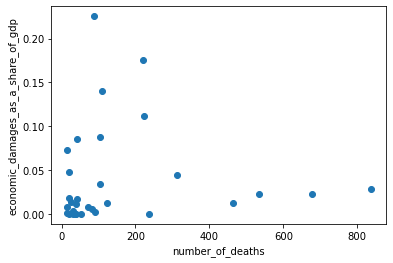

In [22]:
plt.scatter(mx_df.number_of_deaths, mx_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('number_of_deaths')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

# Scaler the dataset

In [23]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(mx_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
 'population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths',
 'economic_damages_as_a_share_of_gdp'])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.set_index(mx_df.index,inplace = True)
df_scaled.head()


Scaled Dataset Using StandardScaler


,population_population_total,annual_co2_emissions_tons,temperature_change_temp_change_celsius,total_count_disasters,people_affected_per_100k,number_of_deaths,economic_damages_as_a_share_of_gdp
year,,,,,,,
1988,-1.768702,0.127101,-0.203039,0.807553,-0.217165,-1.721292,-1.461427
1989,-1.485733,-0.690965,-0.211259,-0.538162,-1.706298,-1.611038,-0.665480
1990,-1.587993,-0.456423,-0.211018,1.562344,-1.209920,-1.501202,-1.220615
1991,-1.380059,-0.688059,-0.211129,-0.558025,-1.209920,-1.391695,-1.202871
1992,-1.338014,-0.589502,0.674756,-0.324635,-1.209920,-1.282675,-1.654077


In [24]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1988 to 2020
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   population_population_total             32 non-null     float64
 1   annual_co2_emissions_tons               32 non-null     float64
 2   temperature_change_temp_change_celsius  32 non-null     float64
 3   total_count_disasters                   32 non-null     float64
 4   people_affected_per_100k                32 non-null     float64
 5   number_of_deaths                        32 non-null     float64
 6   economic_damages_as_a_share_of_gdp      32 non-null     float64
dtypes: float64(7)
memory usage: 2.0 KB


<Figure size 720x1080 with 0 Axes>

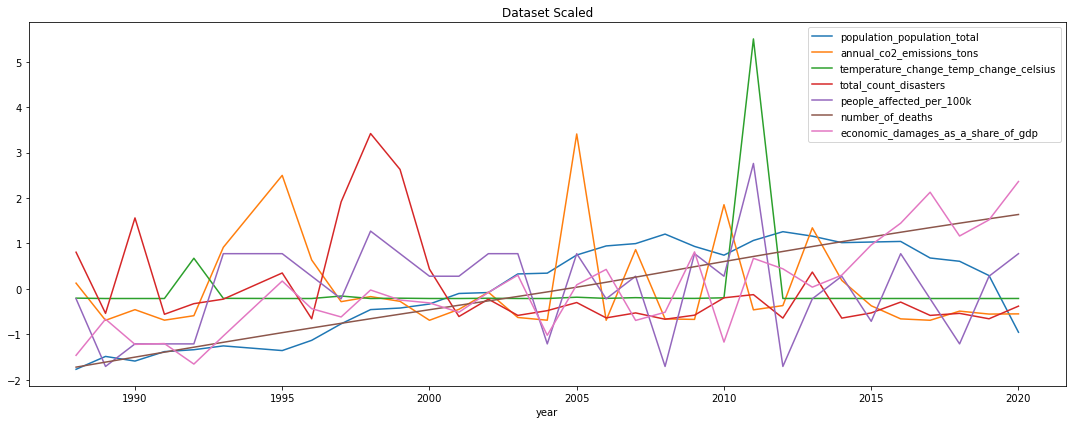

In [25]:
plt.figure(figsize=(10,15))
df_scaled.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout() 

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

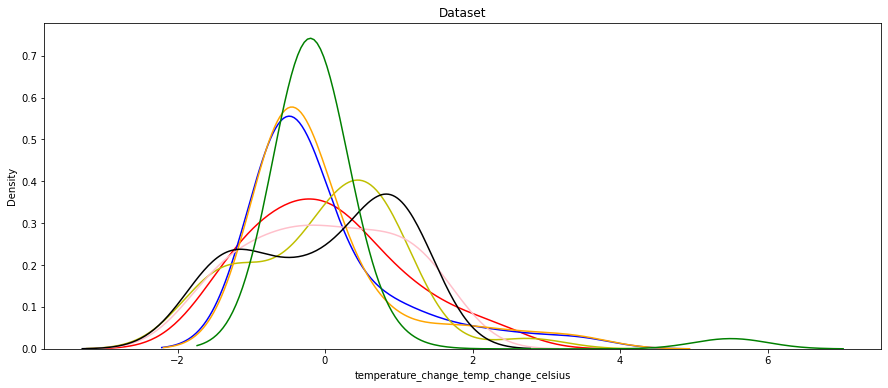

In [26]:
# Density plot for all variables

plt.figure(figsize=(5, 7))

ax = sb.distplot(df_scaled['economic_damages_as_a_share_of_gdp'], hist=False, color="r", label="economic_damages_as_a_share_of_gdp")
sb.distplot(df_scaled['annual_co2_emissions_tons'], hist=False, color="b", label="annual_co2_emissions_tons" , ax=ax)
sb.distplot(df_scaled['people_affected_per_100k'], hist=False, color="y", label="people_affected_per_100k" , ax=ax)
sb.distplot(df_scaled['number_of_deaths'], hist=False, color="pink", label="number_of_deaths" , ax=ax)
sb.distplot(df_scaled['total_count_disasters'], hist=False, color="orange", label="total_count_disasters" , ax=ax)
sb.distplot(df_scaled['population_population_total'], hist=False, color="black", label="population_population_total" , ax=ax)
sb.distplot(df_scaled['temperature_change_temp_change_celsius'], hist=False, color="green", label="temperature_change_temp_change_celsius" , ax=ax)
plt.title('Dataset')
plt.gcf().set_size_inches(15, 6)

plt.show()
plt.close()

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


# Regular and Robust regression models

### Linear regression on a dataset with outliers

In [27]:
df_scaled.head()

,population_population_total,annual_co2_emissions_tons,temperature_change_temp_change_celsius,total_count_disasters,people_affected_per_100k,number_of_deaths,economic_damages_as_a_share_of_gdp
year,,,,,,,
1988,-1.768702,0.127101,-0.203039,0.807553,-0.217165,-1.721292,-1.461427
1989,-1.485733,-0.690965,-0.211259,-0.538162,-1.706298,-1.611038,-0.665480
1990,-1.587993,-0.456423,-0.211018,1.562344,-1.209920,-1.501202,-1.220615
1991,-1.380059,-0.688059,-0.211129,-0.558025,-1.209920,-1.391695,-1.202871
1992,-1.338014,-0.589502,0.674756,-0.324635,-1.209920,-1.282675,-1.654077


In [28]:
# linear regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# summarize shape
print(X.shape, y.shape)

(32, 6) (32,)


In [29]:
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)


# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))

# Calculating the parameters using the least square method
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0 and theta1
y_line = X.dot(theta)


Mean MAE: 0.558 (0.397)
The parameters of the line: [-0.39746534 -0.17665941 -0.11060494 -0.02809593  0.28154977  1.06340848]


### Huber regression on a dataset with outliers - Robust model-
La regresión de Huber es un tipo de regresión robusta que es consciente de la posibilidad de valores atípicos en un conjunto de datos y les asigna menos peso que otros ejemplos en el conjunto de datos.

Podemos usar la regresión de Huber a través de la clase HuberRegressor en scikit-learn. El argumento " épsilon " controla lo que se considera un valor atípico, donde los valores más pequeños consideran más valores atípicos de los datos y, a su vez, hacen que el modelo sea más robusto para los valores atípicos. El valor predeterminado es 1,35.

In [30]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


Mean MAE: 0.544 (0.326)


### Regresión RANSAC

Random Sample Consensus , o RANSAC para abreviar, es otro algoritmo de regresión robusto.

RANSAC intenta separar los datos en valores atípicos e internos y ajusta el modelo en los valores internos.

La biblioteca scikit-learn proporciona una implementación a través de la clase RANSACRegressor .

In [31]:
# ransac regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
evaluate_model(X, y, model).any()
 
# load dataset
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = RANSACRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


Mean MAE: 3.791 (13.005)


### Regresión de Theil Sen
La regresión de Theil Sen implica ajustar modelos de regresión múltiple en subconjuntos de los datos de entrenamiento y combinar los coeficientes al final.

El scikit-learn proporciona una implementación a través de la clase TheilSenRegressor .

In [32]:
# theilsen regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

print(X.shape)
print(y.shape)

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = TheilSenRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


(32, 6)
(32,)
Mean MAE: 0.657 (0.680)


### Comparison of Linear Regression Models

>Linear 0.558 (0.397)
>Huber 0.544 (0.326)
>RANSAC 3.327 (12.659)
>TheilSen 0.664 (0.701)


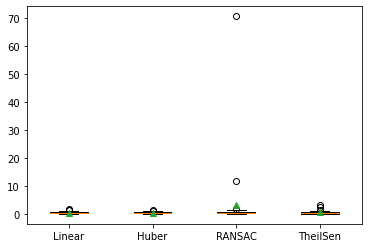

In [33]:

# compare robust regression algorithms on a regression dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# dictionary of model names and model objects
def get_models():
    models = dict()
    models['Linear'] = LinearRegression()
    models['Huber'] = HuberRegressor()
    models['RANSAC'] = RANSACRegressor()
    models['TheilSen'] = TheilSenRegressor()
    return models
 
# evaluate a model
def evalute_model(X, y, model, name):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    return scores
 
# load the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
    # evaluate the model
    results[name] = evalute_model(X, y, model, name)
    # summarize progress
    print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.show()

### Training and testing the Linear Regression Model

In [36]:
df_scaled.set_index(mx_df.index,inplace = True)
df_scaled.head()

,population_population_total,annual_co2_emissions_tons,temperature_change_temp_change_celsius,total_count_disasters,people_affected_per_100k,number_of_deaths,economic_damages_as_a_share_of_gdp
year,,,,,,,
1988,-1.768702,0.127101,-0.203039,0.807553,-0.217165,-1.721292,-1.461427
1989,-1.485733,-0.690965,-0.211259,-0.538162,-1.706298,-1.611038,-0.665480
1990,-1.587993,-0.456423,-0.211018,1.562344,-1.209920,-1.501202,-1.220615
1991,-1.380059,-0.688059,-0.211129,-0.558025,-1.209920,-1.391695,-1.202871
1992,-1.338014,-0.589502,0.674756,-0.324635,-1.209920,-1.282675,-1.654077


In [37]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 2)
tss

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [38]:
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

In [39]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [40]:
X_train.index

Int64Index([1988, 1989, 1990, 1991, 1992, 1993, 1995, 1996, 1997, 1998, 1999,
            2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='year')

In [41]:
X_test.index

Int64Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year')

In [42]:
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
#Entreno el modelo
model = regr.fit(X_train, y_train)

In [43]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [44]:
df_LRpred=pd.DataFrame({'Actual':y_test, 'Fitted':Y_pred_multiple})
df_LRpred.head()

,Actual,Fitted
year,,
2011,0.672927,-2.834101
2012,0.442254,-0.857138
2013,0.039211,-0.558470
2014,0.302837,-0.264770
2015,0.966971,-0.671398


<Figure size 720x1080 with 0 Axes>

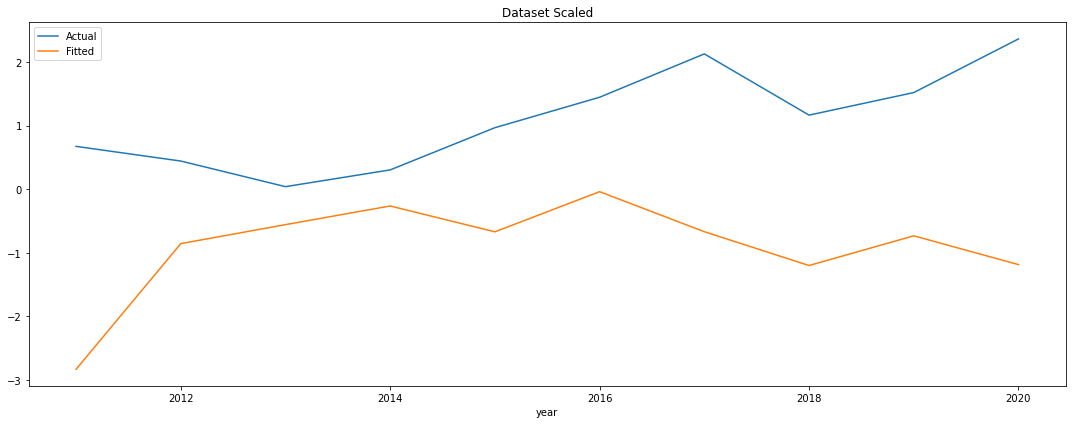

In [45]:
plt.figure(figsize=(10,15))
df_LRpred.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout()

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


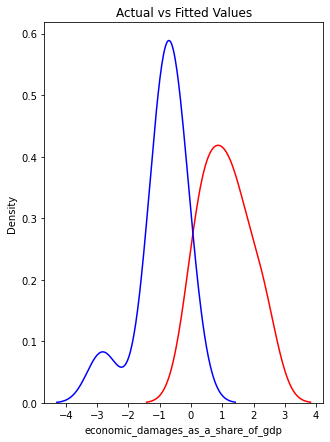

In [46]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(Y_pred_multiple, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [47]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(regr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[ 0.49197467 -0.1165285  -0.67354875 -0.05550269  0.43404863 -0.39937152]
Valor de la intersección o coeficiente "b":
-0.6270090203690848


In [48]:
print('Precisión del modelo:')
print(regr.score(X_train, y_train))

Precisión del modelo:
0.5667261638306775


In [49]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.567
Model:                                            OLS   Adj. R-squared:                  0.393
Method:                                 Least Squares   F-statistic:                     3.270
Date:                                Tue, 06 Sep 2022   Prob (F-statistic):             0.0292
Time:                                        18:55:20   Log-Likelihood:                -12.068
No. Observations:                                  22   AIC:                             38.14
Df Residuals:                                      15   BIC:                             45.77
Df Model:                                           6                                         
Covariance Type:                            nonrobust                                         
                                             coef 

In [50]:
print(modelo.pvalues)

const                                     0.040625
population_population_total               0.366573
annual_co2_emissions_tons                 0.314843
temperature_change_temp_change_celsius    0.298929
total_count_disasters                     0.622043
people_affected_per_100k                  0.018228
number_of_deaths                          0.604063
dtype: float64


In [51]:
print('R2 score:', modelo.rsquared)

R2 score: 0.5667261638306774


In [52]:
print('F-statistic:', modelo.fvalue)
print('Probability of observing value at least as high as F-statistic:', modelo.f_pvalue)

F-statistic: 3.270023000011025
Probability of observing value at least as high as F-statistic: 0.02922228478179872


In [53]:
df_scaled['residual'] = modelo.resid

In [54]:
Y_pred = modelo.predict(X_train)

In [55]:
df_scaled['predictions'] = modelo.predict(X_train)

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Assumption Testing

#### Linearity:
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


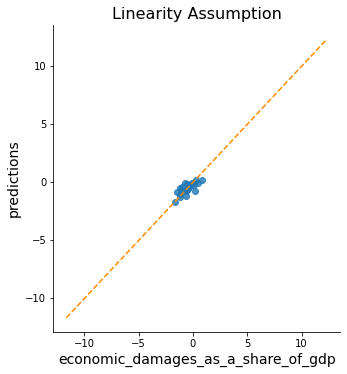

In [56]:
# Plotting the observed vs predicted values
sb.lmplot(x='economic_damages_as_a_share_of_gdp', y='predictions', data=df_scaled, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].min().min()-10, 
                        df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('predictions', fontsize=14)
plt.xlabel('economic_damages_as_a_share_of_gdp', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The scatter plots show residual point are spread around the diagonal line, so we can assume that there is linear relationship between our independent and dependent variables.

#### Normality:
This assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. 

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


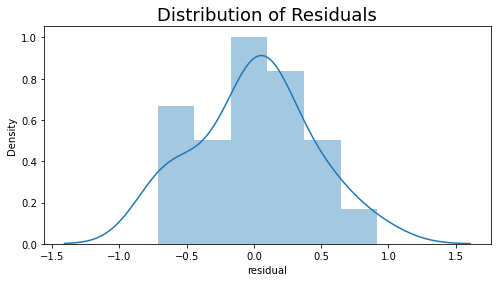

Residuals are not normally distributed


In [57]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_scaled['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sb.distplot(df_scaled['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

#### Multicollinearity:
This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data

Pearson correlation coefficient matrix of each variables:
                                         annual_co2_emissions_tons  \
annual_co2_emissions_tons                                1.000000   
people_affected_per_100k                                 0.277131   
number_of_deaths                                        -0.082425   
total_count_disasters                                    0.036291   
population_population_total                              0.008646   
temperature_change_temp_change_celsius                  -0.094689   

                                        people_affected_per_100k  \
annual_co2_emissions_tons                               0.277131   
people_affected_per_100k                                1.000000   
number_of_deaths                                        0.160504   
total_count_disasters                                   0.220202   
population_population_total                             0.112158   
temperature_change_temp_change_celsius           

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


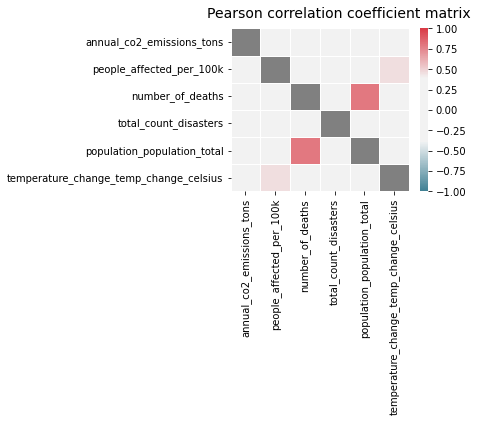

In [58]:
corr = df_scaled[['annual_co2_emissions_tons',
 'people_affected_per_100k',
 'number_of_deaths',
 'total_count_disasters',
 'population_population_total',
 'temperature_change_temp_change_celsius']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

#### Autocorrelation
Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine if either positive or negative correlation is present. In this step we will use the durbin_watson () function from statsmodel to calculate our Durbin-Watson score and then assess the value with the following condition:

If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied


If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied


If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [59]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_scaled['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: nan
Little to no autocorrelation 

Assumption satisfied


#### Homoscedasticity
This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.

In [60]:
df_scaled.head()

,population_population_total,annual_co2_emissions_tons,temperature_change_temp_change_celsius,total_count_disasters,people_affected_per_100k,number_of_deaths,economic_damages_as_a_share_of_gdp,residual,predictions
year,,,,,,,,,
1988,-1.768702,0.127101,-0.203039,0.807553,-0.217165,-1.721292,-1.461427,-0.634561,-0.826866
1989,-1.485733,-0.690965,-0.211259,-0.538162,-1.706298,-1.611038,-0.665480,0.537005,-1.202486
1990,-1.587993,-0.456423,-0.211018,1.562344,-1.209920,-1.501202,-1.220615,0.004670,-1.225286
1991,-1.380059,-0.688059,-0.211129,-0.558025,-1.209920,-1.391695,-1.202871,-0.180903,-1.021968
1992,-1.338014,-0.589502,0.674756,-0.324635,-1.209920,-1.282675,-1.654077,0.011872,-1.665948


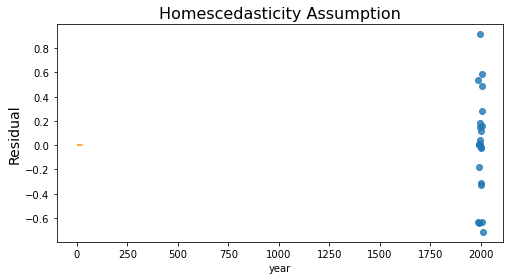

In [61]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_scaled.index, y=df_scaled.residual, alpha=0.8)
plt.plot(np.repeat(0,len(df_scaled.index)+2), color='darkorange', linestyle='--')


plt.ylabel('Residual', fontsize=14)
plt.xlabel('year')
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Huber Model: selected by the MAE criteria

In [62]:
df_scaled.head()

,population_population_total,annual_co2_emissions_tons,temperature_change_temp_change_celsius,total_count_disasters,people_affected_per_100k,number_of_deaths,economic_damages_as_a_share_of_gdp,residual,predictions
year,,,,,,,,,
1988,-1.768702,0.127101,-0.203039,0.807553,-0.217165,-1.721292,-1.461427,-0.634561,-0.826866
1989,-1.485733,-0.690965,-0.211259,-0.538162,-1.706298,-1.611038,-0.665480,0.537005,-1.202486
1990,-1.587993,-0.456423,-0.211018,1.562344,-1.209920,-1.501202,-1.220615,0.004670,-1.225286
1991,-1.380059,-0.688059,-0.211129,-0.558025,-1.209920,-1.391695,-1.202871,-0.180903,-1.021968
1992,-1.338014,-0.589502,0.674756,-0.324635,-1.209920,-1.282675,-1.654077,0.011872,-1.665948


In [63]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train.index


Mean MAE: 0.544 (0.326)


Int64Index([1988, 1989, 1990, 1991, 1992, 1993, 1995, 1996, 1997, 1998, 1999,
            2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='year')

In [64]:
X_test.index

Int64Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year')

In [65]:
# define the model
model = HuberRegressor()

#Entreno el modelo
model_hu = model.fit(X_train, y_train)

#Realizo una predicción
y_pred = model_hu.predict(X_test)

# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


Mean MAE: 0.544 (0.326)


In [66]:
def mape(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape(y_test, y_pred.reshape(-1,1))

435.36239268505545

In [67]:
df_HUpred=pd.DataFrame({'Actual':y_test, 'Fitted':y_pred})
df_HUpred.head()

,Actual,Fitted
year,,
2011,0.672927,-2.375144
2012,0.442254,-0.808176
2013,0.039211,-0.483031
2014,0.302837,-0.256543
2015,0.966971,-0.685100


<Figure size 720x1080 with 0 Axes>

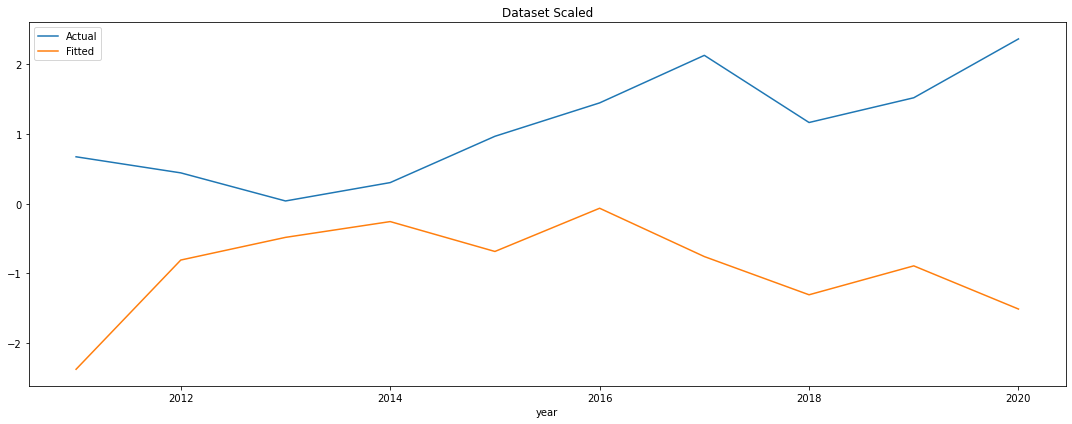

In [68]:
plt.figure(figsize=(10,15))
df_HUpred.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout()

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


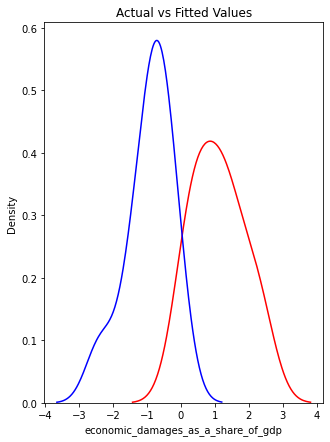

In [69]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [70]:
print('Intercept:', model_hu.intercept_)
print('Coefficients:', model_hu.coef_)

Intercept: -0.6153201946234212
Coefficients: [ 0.6202369  -0.09445823 -0.60100787 -0.04373761  0.43496138 -0.51068832]


In [71]:
print('Precisión del modelo:')
print(model_hu.score(X_train, y_train))

Precisión del modelo:
0.5586692107825272


## Modelo DISCRETO: Random Forest 


In [72]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn import svm

In [73]:
mx_df.head()

,annual_co2_emissions_tons,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,total_count_disasters,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,
1988,305665561,0.044958,723.779227,311.0,5.0,80788725,0.131
1989,323480321,0.000000,0.000000,40.0,2.0,82368930,0.445
1990,317042355,0.012890,21.204865,463.0,3.0,83943135,0.226
1991,330133158,0.000160,11.460246,36.0,3.0,85512621,0.233
1992,332780138,0.005576,78011.484353,83.0,3.0,87075136,0.055


In [74]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 2)
tss

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [75]:
# Set independent and dependent variables
X = df_scaled[['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

In [76]:
feature_list = list(X.columns)
feature_list

['population_population_total',
 'annual_co2_emissions_tons',
 'temperature_change_temp_change_celsius',
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']

In [77]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [78]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (22, 6)
y_train shape: (22,)
X_test shape: (10, 6)
y_test shape: (10,)


In [79]:
X_train.index

Int64Index([1988, 1989, 1990, 1991, 1992, 1993, 1995, 1996, 1997, 1998, 1999,
            2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='year')

In [80]:
X_test.index

Int64Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year')

In [81]:
# The baseline predictions 
baseline_preds = y_test
print('Error promedio de línea base: ', round(np.mean(baseline_preds), 2))

Error promedio de línea base:  1.1


In [82]:
from sklearn.ensemble import RandomForestRegressor
# Crear una instancia del modelo con 1000 árboles de decisión 
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Entrenar el modelo con datos de entrenamiento 
rf.fit(X_train, y_train);

In [83]:
# Usar el método de predicción del bosque en las 
predictions= rf.predict(X_test)

In [84]:
print('Precisión del modelo:')
print(rf.score(X_train, y_train))

Precisión del modelo:
0.9160197022589759


In [85]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = mse**.5
print(mse)
print(rmse)

2.3794646668274457
1.5425513498186845


In [86]:
df_RFpred=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df_RFpred.head()

,Actual,Predicted
year,,
2011,0.672927,0.012864
2012,0.442254,-0.368167
2013,0.039211,-0.560198
2014,0.302837,-0.283538
2015,0.966971,-0.574170


<Figure size 720x1080 with 0 Axes>

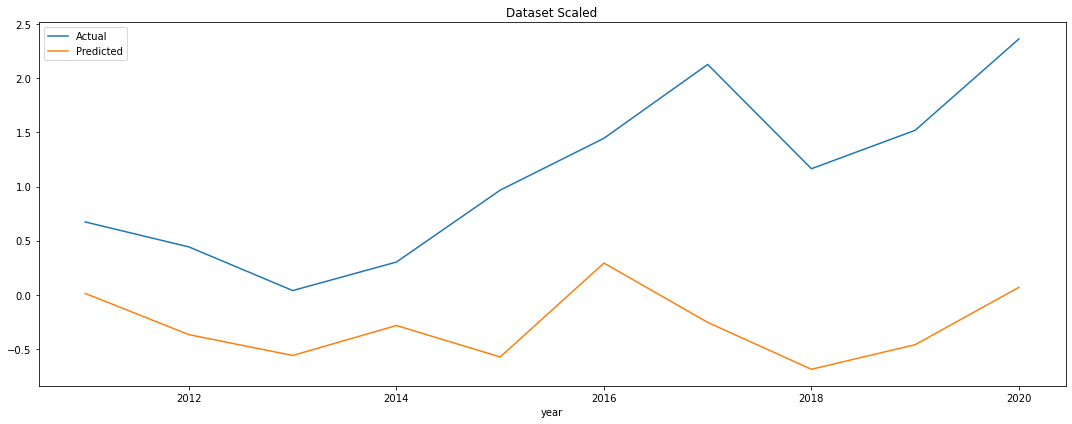

In [87]:
plt.figure(figsize=(10,15))
df_RFpred.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout()

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


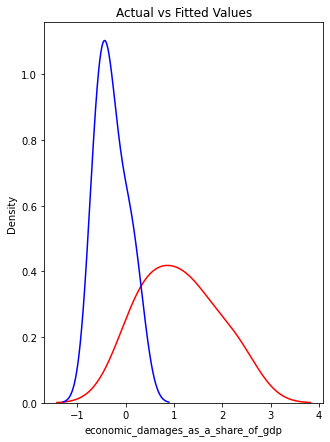

In [88]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [89]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.3860100091077103
Mean Squared Error: 2.3794646668274457
Root Mean Squared Error: 1.5425513498186845


In [90]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.39 
Accuracy: -174.11 %.


In [91]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: number_of_deaths     Importance: 0.31
Variable: people_affected_per_100k Importance: 0.29
Variable: population_population_total Importance: 0.12
Variable: temperature_change_temp_change_celsius Importance: 0.1
Variable: annual_co2_emissions_tons Importance: 0.09
Variable: total_count_disasters Importance: 0.09


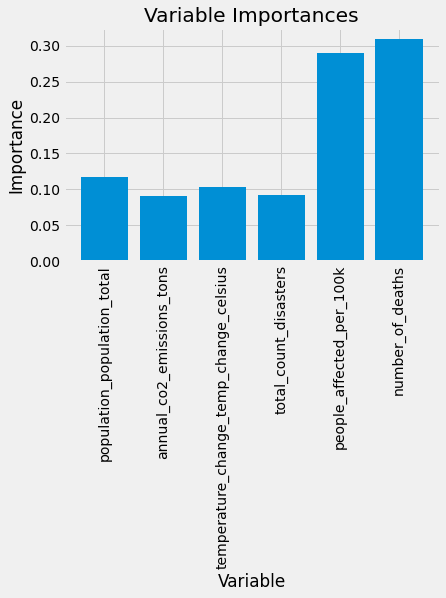

In [92]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


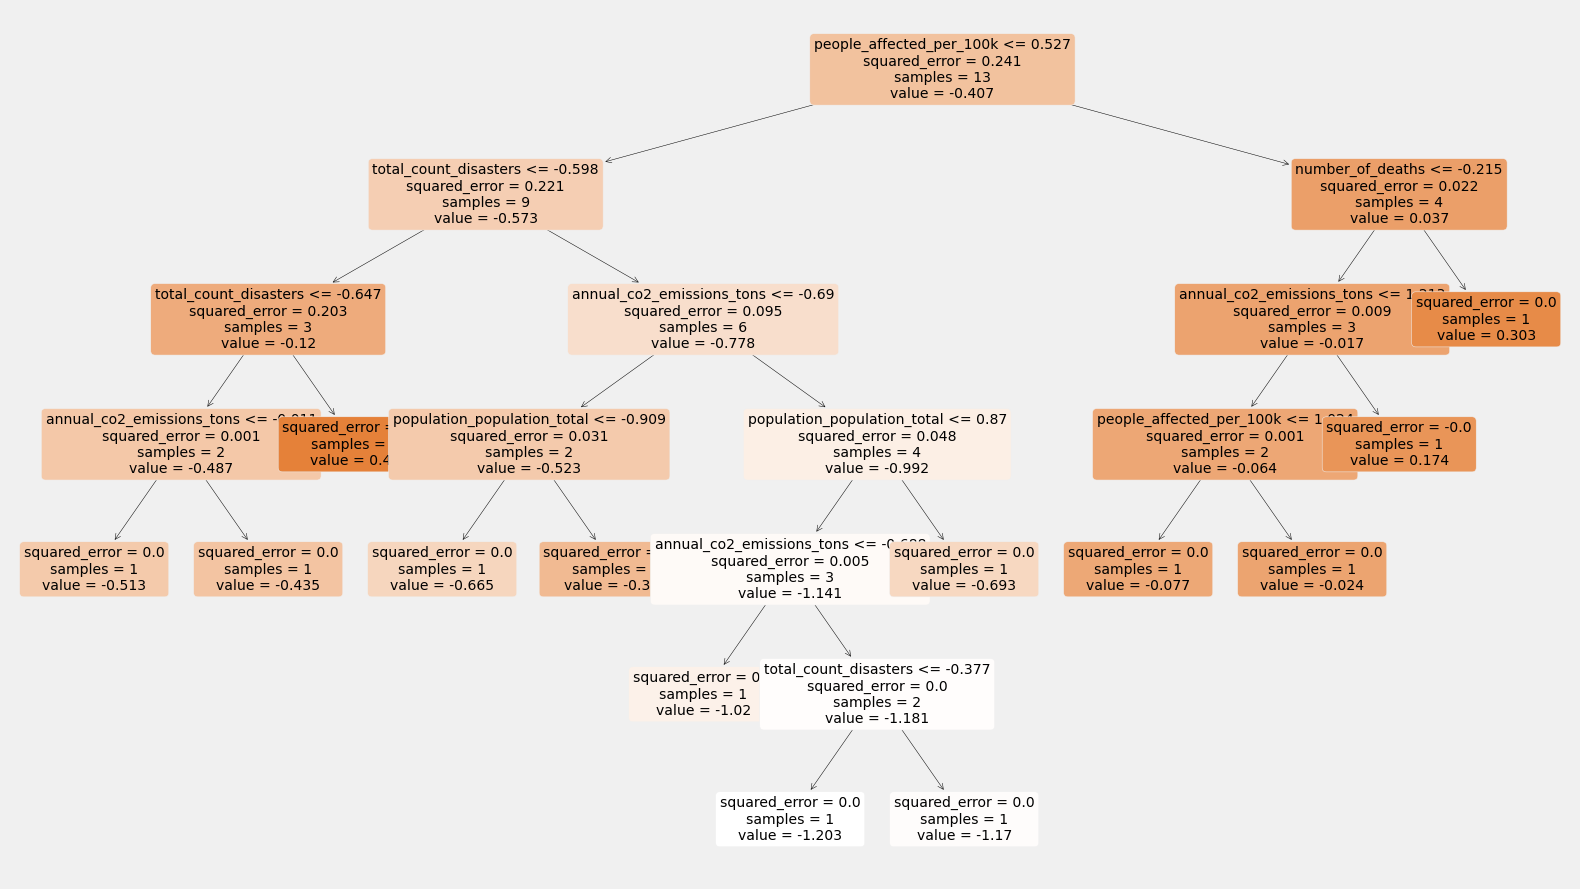

In [93]:
import pydot
# Pull out one tree from the forest
Tree = rf.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True,
              feature_names = feature_list,
              rounded=True, 
              fontsize=14);




In [94]:
# Grid de hiperparámetros evaluados
# ==============================================================================
from sklearn.model_selection import ParameterGrid

param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓


,oob_r2,max_depth,max_features,n_estimators
0,0.328115,NaN,5.0,150.0
2,0.328115,10.0,5.0,150.0
3,0.328115,20.0,5.0,150.0
1,0.317758,3.0,5.0,150.0


In [95]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

#### Grid Search basado en validación cruzada


In [96]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
0,None,5,150,-0.542528,0.141539,-0.197229,0.020465
2,10,5,150,-0.542528,0.141539,-0.197229,0.020465
3,20,5,150,-0.542528,0.141539,-0.197229,0.020465
1,3,5,150,-0.547941,0.140916,-0.225649,0.020999


In [97]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': None, 'max_features': 5, 'n_estimators': 150} : -0.5425276967661168 neg_root_mean_squared_error


In [98]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1.5399283058301227


In [99]:
from sklearn.inspection import permutation_importance
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
4,0.232740,0.058999,people_affected_per_100k
5,0.223533,0.013707,number_of_deaths
0,0.081651,0.019453,population_population_total
1,0.073458,0.014119,annual_co2_emissions_tons
2,0.070293,0.012040,temperature_change_temp_change_celsius
3,0.051909,0.012716,total_count_disasters


In [100]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 3, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('population_population_total'), 
                     feature_list.index('number_of_deaths')]

train_important = X_train.values[:,important_indices]
test_important = X_test.values[:,important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), '')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')



Mean Absolute Error: 1.8 
Accuracy: -270.95 %.


In [101]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.8031317568385454
Mean Squared Error: 3.71450963908376
Root Mean Squared Error: 1.9273063168795355


In [102]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.8 
Accuracy: -270.95 %.


In [103]:
# Error de test del modelo modificado
# ==============================================================================
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1.9273063168795355


In [104]:
df_RFpred_mod=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df_RFpred_mod.head()

,Actual,Predicted
year,,
2011,0.672927,-0.852215
2012,0.442254,-0.732232
2013,0.039211,-0.732232
2014,0.302837,-0.852215
2015,0.966971,-0.852215


<Figure size 720x1080 with 0 Axes>

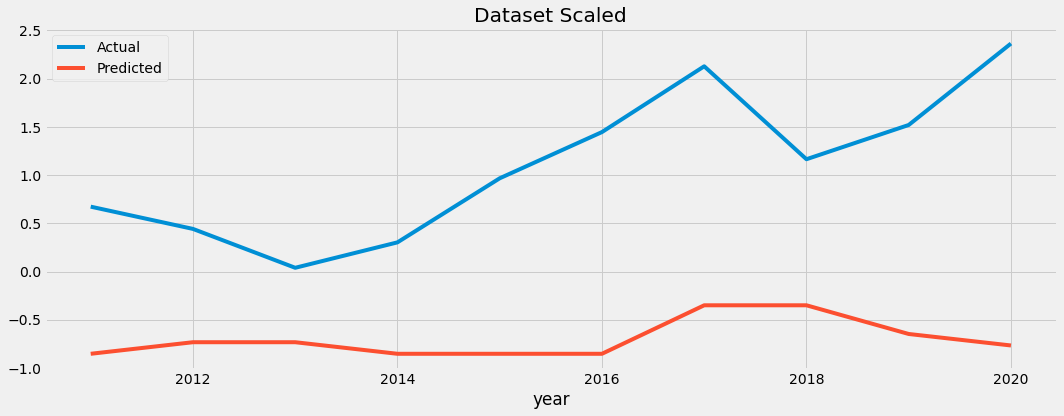

In [105]:
plt.figure(figsize=(10,15))
df_RFpred_mod.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout() 

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


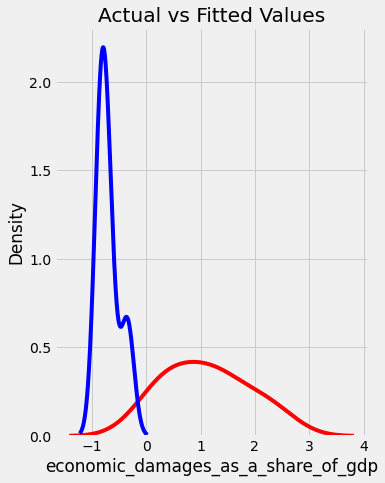

In [106]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [107]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pydotplus import graph_from_dot_data
import pydot


[Text(0.5769230769230769, 0.875, 'people_affected_per_100k <= 0.5\nsquared_error = 0.5\nsamples = 13\nvalue = -0.4'),
 Text(0.3076923076923077, 0.625, 'total_count_disasters <= -0.6\nsquared_error = 0.2\nsamples = 10\nvalue = -0.8'),
 Text(0.15384615384615385, 0.375, 'annual_co2_emissions_tons <= -0.7\nsquared_error = 0.2\nsamples = 3\nvalue = -0.2'),
 Text(0.07692307692307693, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.4'),
 Text(0.23076923076923078, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = -0.5'),
 Text(0.46153846153846156, 0.375, 'temperature_change_temp_change_celsius <= 0.3\nsquared_error = 0.1\nsamples = 7\nvalue = -0.9'),
 Text(0.38461538461538464, 0.125, 'squared_error = 0.0\nsamples = 6\nvalue = -0.9'),
 Text(0.5384615384615384, 0.125, 'squared_error = -0.0\nsamples = 1\nvalue = -1.7'),
 Text(0.8461538461538461, 0.625, 'number_of_deaths <= -0.1\nsquared_error = 0.2\nsamples = 3\nvalue = 0.5'),
 Text(0.7692307692307693, 0.375, 'people_affected_per_100k <= 1.0\

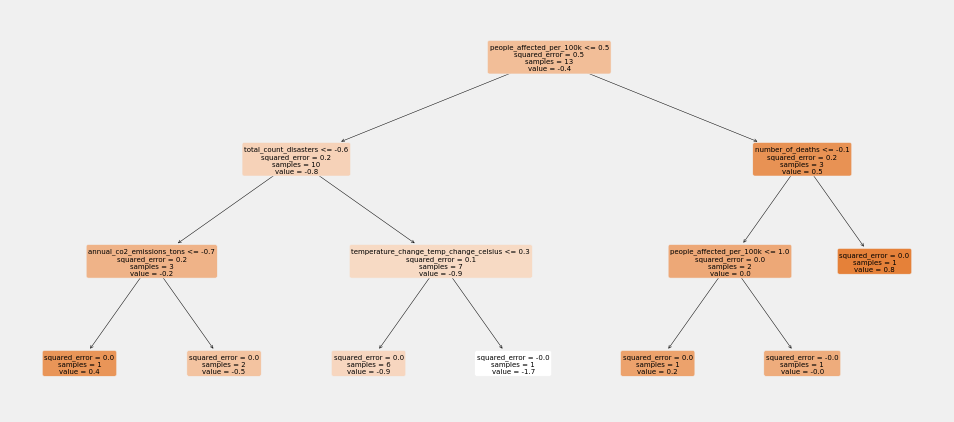

In [108]:
# Limit depth of tree to 3 levels
from sklearn import tree
rf_small = RandomForestRegressor(n_estimators=6, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
plt.figure(figsize=(15,7))
tree.plot_tree(tree_small, filled=True, feature_names = feature_list, rounded = True, precision = 1, fontsize=7)


In [109]:
# Limit depth of tree to 3 levels
from sklearn import tree
rf_small = RandomForestRegressor(n_estimators=6, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');


#### Tomando el modelo mas significativo y reduciendolo


In [110]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 2)
tss

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [111]:
# Set independent and dependent variables
X = df_scaled[[
 'total_count_disasters',
 'people_affected_per_100k',
 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

In [112]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [113]:
# Initialize model from sklearn and fit it into our data
regr = linear_model.HuberRegressor()
#Entreno el modelo
model = regr.fit(X_train, y_train)

In [114]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [115]:
df_HUpred=pd.DataFrame({'Actual':y_test, 'Fitted':Y_pred_multiple})
df_HUpred.head()

,Actual,Fitted
year,,
2011,0.672927,1.127012
2012,0.442254,-0.407014
2013,0.039211,0.176949
2014,0.302837,0.405060
2015,0.966971,0.104165


<Figure size 720x1080 with 0 Axes>

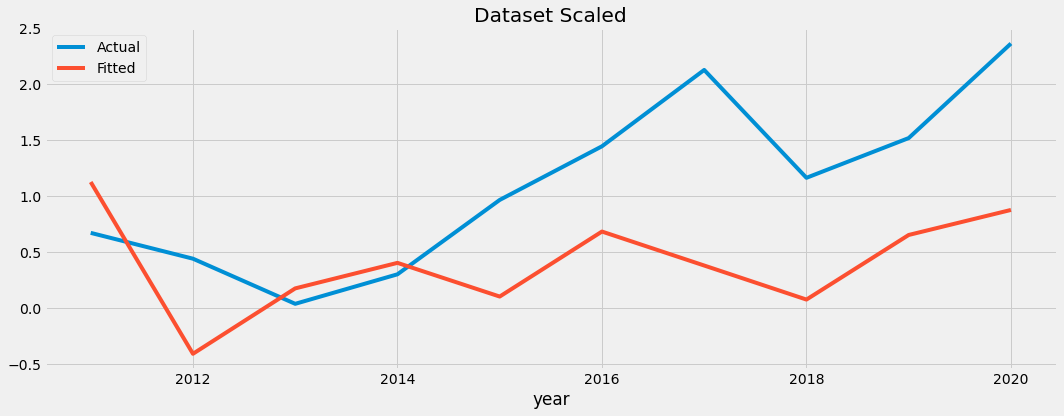

In [116]:
plt.figure(figsize=(10,15))
df_HUpred.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout()

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


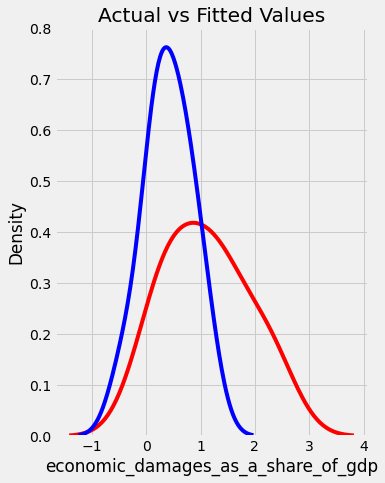

In [117]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(Y_pred_multiple, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [118]:
print('Intercept:', regr.intercept_)
print('Coefficients:', regr.coef_)

Intercept: -0.2075320021173668
Coefficients: [0.00104051 0.35545591 0.49455289]


In [119]:
print('Precisión del modelo:')
print(regr.score(X_train, y_train))

Precisión del modelo:
0.4243460097038302


Modelo Satelite


In [120]:
# Set independent and dependent variables
X = df_scaled[[
 'temperature_change_temp_change_celsius']]
y = df_scaled['total_count_disasters']

In [121]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [122]:
X_train.head()

,temperature_change_temp_change_celsius
year,
1988,-0.203039
1989,-0.211259
1990,-0.211018
1991,-0.211129
1992,0.674756


In [123]:
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
#Entreno el modelo
model = regr.fit(X_train, y_train)

In [124]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [125]:
df_LRpred=pd.DataFrame({'Actual':y_test, 'Fitted':Y_pred_multiple})
df_LRpred.head()

,Actual,Fitted
year,,
2011,-0.126006,-2.707707
2012,-0.642442,0.206270
2013,0.370568,0.205861
2014,-0.642442,0.206006
2015,-0.528230,0.206601


<Figure size 720x1080 with 0 Axes>

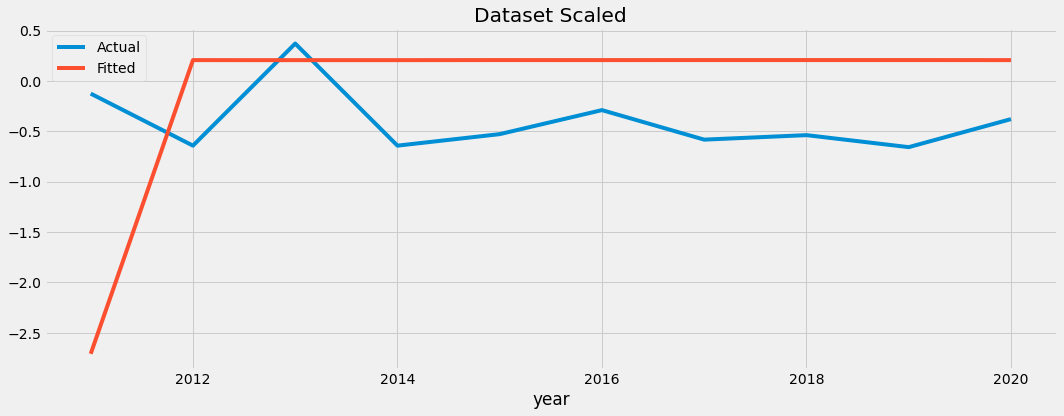

In [126]:
plt.figure(figsize=(10,15))
df_LRpred.plot.line()
plt.gcf().set_size_inches(15, 6)
x=['year']

plt.title("Dataset Scaled");
plt.tight_layout()

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


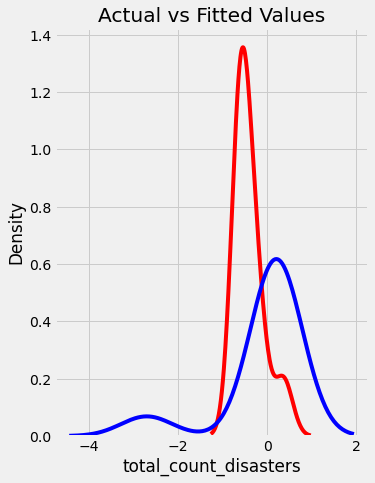

In [127]:
plt.figure(figsize=(5, 7))

ax = sb.distplot(y_test, hist=False, color="r", label="Actual Value")
sb.distplot(Y_pred_multiple, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [128]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                              OLS Regression Results                             
Dep. Variable:     total_count_disasters   R-squared:                       0.007
Model:                               OLS   Adj. R-squared:                 -0.043
Method:                    Least Squares   F-statistic:                    0.1351
Date:                   Tue, 06 Sep 2022   Prob (F-statistic):              0.717
Time:                           18:56:38   Log-Likelihood:                -34.075
No. Observations:                     22   AIC:                             72.15
Df Residuals:                         20   BIC:                             74.33
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

ref. https://www.cienciadedatos.net/documentos/py08_random_forest_python.html